In [ ]:
# unduh dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-06-08 11:09:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  8.59MB/s    in 9.0s    

2021-06-08 11:09:17 (6.45 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [34]:
# import modul
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
%matplotlib inline

In [ ]:
# mengekstrak file
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
dir = '/tmp/Chessman-image-dataset/Chess'
os.listdir(dir)

['Queen', 'Rook', 'King', 'Pawn', 'Bishop', 'Knight']

In [ ]:
pawn = os.path.join(dir, 'Pawn')
king = os.path.join(dir, 'King')
knight = os.path.join(dir, 'Knight')

print('total pawn images :', len(os.listdir(pawn)))
print('total King images :', len(os.listdir(king)))
print('total Knight images :', len(os.listdir(knight)))

total pawn images : 107
total King images : 76
total Knight images : 106


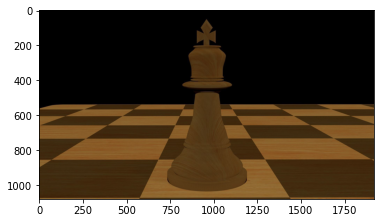

In [ ]:
# load contoh image
img = image.load_img(os.path.join(king, '00000145.png'))
imgplot = plt.imshow(img)

In [ ]:
# image data generator
train_dir = os.path.join(dir)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=8,
                                                    class_mode='categorical',
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [28]:
model = tf.keras.models.Sequential([ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
                                    
                                    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    # tf.keras.layers.Dropout(0.4),
                                    
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    # tf.keras.layers.Dropout(0.4),
                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),

                                    tf.keras.layers.Dense(6, activation='softmax')

                                    ])
model.layers[0].trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               26214912  
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 1542      
Total params: 84,679,430
Trainable params: 26,347,782
Non-trainable params: 58,331,648
_________________________________________________________________


In [29]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# callback
class myCallback(tf.keras.callbacks.Callback) :
  
  def on_epoch_end(self, epoch, logs={}) :
    if logs.get('accuracy') > 0.9 :
      print('\nAkurasi sudah mencapai > 90%!')
      self.model.stop_training = True

callback = myCallback()

In [31]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    batch_size=128,
                    callbacks=callback)

Epoch 1/50
63/63 [==============================] - 145s 2s/step - loss: 7.9390 - accuracy: 0.4649 - val_loss: 2.3817 - val_accuracy: 0.5385
Epoch 2/50
63/63 [==============================] - 131s 2s/step - loss: 1.1513 - accuracy: 0.7295 - val_loss: 1.1337 - val_accuracy: 0.7308
Epoch 3/50
63/63 [==============================] - 130s 2s/step - loss: 1.0877 - accuracy: 0.8096 - val_loss: 1.8379 - val_accuracy: 0.7115
Epoch 4/50
63/63 [==============================] - 131s 2s/step - loss: 0.7461 - accuracy: 0.8337 - val_loss: 1.1121 - val_accuracy: 0.7500
Epoch 5/50
63/63 [==============================] - 132s 2s/step - loss: 0.6147 - accuracy: 0.8637 - val_loss: 1.4464 - val_accuracy: 0.7308
Epoch 6/50
63/63 [==============================] - 133s 2s/step - loss: 0.4849 - accuracy: 0.8878 - val_loss: 1.1503 - val_accuracy: 0.7500
Epoch 7/50
63/63 [==============================] - 132s 2s/step - loss: 0.4268 - accuracy: 0.8798 - val_loss: 1.6634 - val_accuracy: 0.7692
Epoch 8/50
63

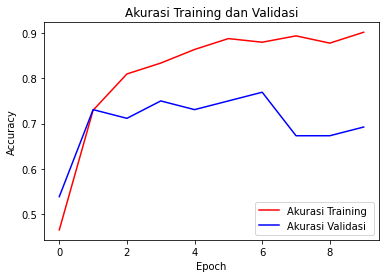

<Figure size 432x288 with 0 Axes>

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                 
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.figure()                                                                      
plt.show()

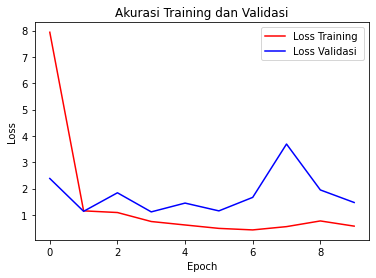

<Figure size 432x288 with 0 Axes>

In [33]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Loss Training ')                 
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.figure()                                                                      
plt.show()

Saving raja.jpg to raja.jpg
raja.jpg
[[0. 0. 1. 0. 0. 0.]]


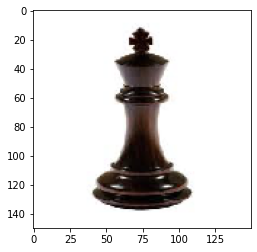

In [39]:
uploaded = files.upload()

for fn in uploaded.keys() :

  # prediksi image
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)

  print(fn)
  print(classes)
  
  # if classes[0][0] == 1 :
  #   print("Bentuk tangan tersebut menunjukan bentuk KERTAS")
  # elif classes[0][1] == 1 :
  #   print("Bentuk tangan tersebut menunjukan bentuk BATU")
  # elif classes[0][2] == 1 :
  #   print("Bentuk tangan tersebut menunjukan bentuk GUNTING")
  # else:
  #   print("Bentuk tangan tidak ditemukan")